In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os



In [11]:
path = r'/Users/buketoztekin/Documents/Quantium/'

In [15]:
file_path = os.path.join(path, '2_Data', 'QVI_purchase_behaviour.csv')
df_purchase = pd.read_csv(file_path)

In [19]:
file_path2 = os.path.join(path, '2_Data', 'QVI_transaction_Data.xlsx')

# Read the Excel file
df_transaction = pd.read_excel(file_path2)

## Purchase Dataset Checks

In [21]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [25]:
df_purchase.shape

(72637, 3)

In [29]:
df_purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [47]:
#Convert the datatype to object for loyalty card number column
df_purchase['LYLTY_CARD_NBR'] = df_purchase['LYLTY_CARD_NBR'].astype(str)

In [49]:
df_purchase.dtypes

LYLTY_CARD_NBR      object
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [53]:
#Check Unique Values for LIFESTAGE and PREMIUM_CUSTOMER
print(df_purchase['LIFESTAGE'].unique())
print(df_purchase['PREMIUM_CUSTOMER'].unique())

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
['Premium' 'Mainstream' 'Budget']


In [57]:
#Count missing values
print(df_purchase[['LIFESTAGE', 'PREMIUM_CUSTOMER']].isnull().sum())  

LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [67]:
#Count duplicates
df_purchase.duplicated().sum()

0

In [61]:
print(df_purchase[['LIFESTAGE']].value_counts())

LIFESTAGE             
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [65]:
print(df_purchase[['PREMIUM_CUSTOMER']].value_counts())

PREMIUM_CUSTOMER
Mainstream          29245
Budget              24470
Premium             18922
Name: count, dtype: int64


## Transaction Dataset checks

In [35]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [37]:
df_transaction.shape

(264836, 8)

In [39]:
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [73]:
# Convert Excel serial number to datetime
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

# Check if it worked
print(df_transaction[['DATE']].head())

        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18


In [75]:
#Convert Loyalty Card Number to string
df_transaction['LYLTY_CARD_NBR'] = df_transaction['LYLTY_CARD_NBR'].astype(str)

In [77]:
df_transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR            object
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [79]:
#Check for missing values
print(df_transaction.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [81]:
#Check for duplicates
df_transaction.duplicated().sum()

1

In [87]:
#Drop the duplicates
df_transaction = df_transaction.drop_duplicates()
df_transaction.duplicated().sum()

0

In [91]:
print(df_transaction['PROD_QTY'].describe())

count    264835.000000
mean          1.907308
std           0.643655
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


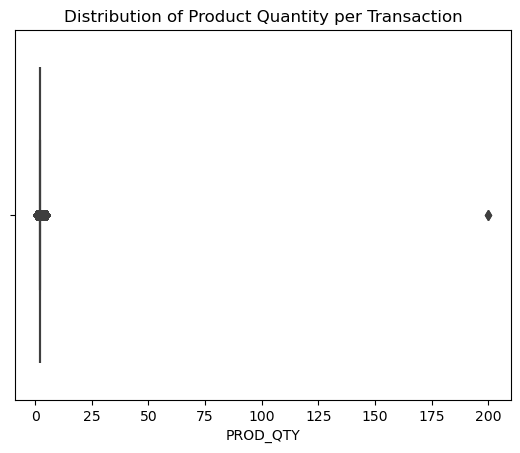

In [103]:
# Boxplot to detect product quantity
sns.boxplot(x=df_transaction['PROD_QTY'])
plt.title("Distribution of Product Quantity per Transaction")

# Show the plot
plt.show()

In [147]:
#Create a bulk_purchase dataframe with purchase quantity above 10
bulk_purchase = df_transaction[df_transaction['PROD_QTY'] > 10]  # Checking for bulk purchases
print(bulk_purchase)

            DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226         226000  226201         4   
69763 2019-05-20        226         226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES BULK_PURCHASE  
69762  Dorito Corn Chp     Supreme 380g       200      650.0           YES  
69763  Dorito Corn Chp     Supreme 380g       200      650.0           YES  


In [141]:
# Remove bulk purchases from main transactions
df_transaction_cleaned = df_transaction[df_transaction['PROD_QTY'] <= 50].copy()

# Check if bulk purchases are gone
print(df_transaction_cleaned[df_transaction_cleaned['PROD_QTY'] > 50])  # Should return empty

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, BULK_PURCHASE]
Index: []


In [145]:
print(df_transaction_cleaned['TOT_SALES'].describe())

count    264833.000000
mean          7.299351
std           2.527244
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max          29.500000
Name: TOT_SALES, dtype: float64


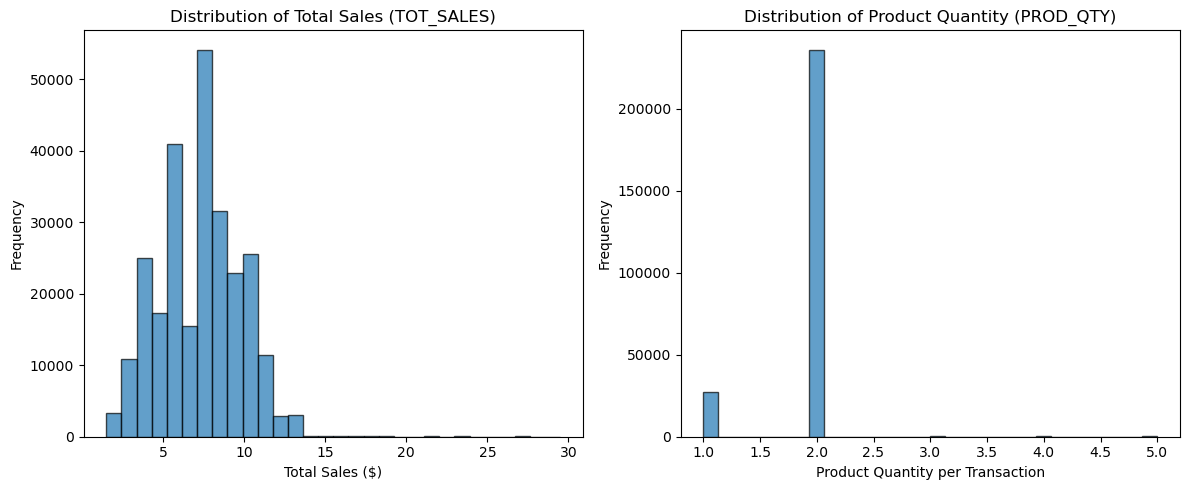

In [159]:
# Create histograms for TOT_SALES and PROD_QTY
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for TOT_SALES
axes[0].hist(df_transaction_cleaned['TOT_SALES'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Total Sales (TOT_SALES)')
axes[0].set_xlabel('Total Sales ($)')
axes[0].set_ylabel('Frequency')

# Histogram for PROD_QTY
axes[1].hist(df_transaction_cleaned['PROD_QTY'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Product Quantity (PROD_QTY)')
axes[1].set_xlabel('Product Quantity per Transaction')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [155]:
df_transaction_cleaned['PROD_NAME'].nunique()

114

In [153]:
print(df_transaction_cleaned['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'RRD Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'RRD SR    Salsa & M

In [157]:
df_transaction_cleaned['PROD_NAME'].value_counts().head(10)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infzns Thai SweetChili PotatoMix 110g       3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: count, dtype: int64

## Merging two dataframes

In [162]:
df_merged = df_purchase.merge(df_transaction, on='LYLTY_CARD_NBR', how='inner')

In [164]:
df_merged['BULK_PURCHASE'] = df_merged['PROD_QTY'].apply(lambda x: 'YES' if x > 10 else 'NO')

In [166]:
df_bulk = df_merged[df_merged['BULK_PURCHASE'] == 'YES']
df_normal = df_merged[df_merged['BULK_PURCHASE'] == 'NO']

In [168]:
df_normal.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BULK_PURCHASE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NO
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,NO
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,NO
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,NO
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,NO


In [170]:
df_bulk.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BULK_PURCHASE
221624,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,YES
221625,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,YES


In [172]:
#Count missing values
print(df_normal.isnull().sum()) 

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BULK_PURCHASE       0
dtype: int64


In [174]:
df_normal.duplicated().sum()

0

In [176]:
df_normal.shape

(264833, 11)

In [182]:
df_normal[['PROD_QTY', 'TOT_SALES']].describe()


,PROD_QTY,TOT_SALES
count,264833.000000,264833.000000
mean,1.905812,7.299351
std,0.343437,2.527244
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,5.000000,29.500000


In [184]:
print("Unique Customers:", df_merged['LYLTY_CARD_NBR'].nunique())
print("Unique Stores:", df_merged['STORE_NBR'].nunique())
print("Unique Products:", df_merged['PROD_NAME'].nunique())
print("Customer Segments:", df_merged['LIFESTAGE'].unique())
print("Premium Segments:", df_merged['PREMIUM_CUSTOMER'].unique())

Unique Customers: 72637
Unique Stores: 272
Unique Products: 114
Customer Segments: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
Premium Segments: ['Premium' 'Mainstream' 'Budget']


In [194]:
#LIFESTAGE spendings
df_normal.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     402420.75
RETIREES                  366470.90
OLDER FAMILIES            352467.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

In [196]:
#PREMIUM_CUSTOMER spendings
df_normal.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()

PREMIUM_CUSTOMER
Budget        7.258838
Mainstream    7.361106
Premium       7.263129
Name: TOT_SALES, dtype: float64

In [208]:
# Best-selling products
df_normal.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64

In [210]:
df_normal.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

STORE_NBR
226    17605.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

In [212]:
df_merged.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

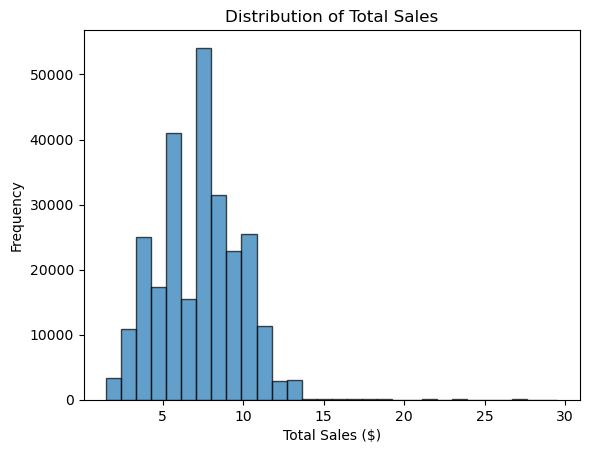

In [216]:
import matplotlib.pyplot as plt

plt.hist(df_normal['TOT_SALES'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.show()

In [236]:
import re

# Function to extract pack size
def extract_pack_size(prod_name):
    match = re.search(r'(\d{2,3})[gG]', prod_name)  # Looks for a number followed by 'g'
    return int(match.group(1)) if match else None  # Convert to integer

# Apply function to create a new 'PACK_SIZE' column
df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].apply(extract_pack_size)

# Check if it worked
print(df_merged[['PROD_NAME', 'PACK_SIZE']].head())


                                PROD_NAME  PACK_SIZE
0  Natural Chip        Compny SeaSalt175g        175
1   Red Rock Deli Chikn&Garlic Aioli 150g        150
2   Grain Waves Sour    Cream&Chives 210G        210
3  Natural ChipCo      Hony Soy Chckn175g        175
4          WW Original Stacked Chips 160g        160


In [259]:
# Extract first word as brand name
df_merged['BRAND'] = df_merged['PROD_NAME'].apply(lambda x: x.split()[0])

# Check results
print(df_merged[['PROD_NAME', 'BRAND']].head(50))


                                   PROD_NAME       BRAND
0     Natural Chip        Compny SeaSalt175g     Natural
1      Red Rock Deli Chikn&Garlic Aioli 150g         Red
2      Grain Waves Sour    Cream&Chives 210G       Grain
3     Natural ChipCo      Hony Soy Chckn175g     Natural
4             WW Original Stacked Chips 160g          WW
5                         Cheetos Puffs 165g     Cheetos
6   Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
7        RRD SR Slow Rst     Pork Belly 150g         RRD
8           Doritos Cheese      Supreme 330g     Doritos
9                   Doritos Mexicana    170g     Doritos
10   Old El Paso Salsa   Dip Tomato Med 300g         Old
11     GrnWves Plus Btroot & Chilli Jam 180g     GrnWves
12   Old El Paso Salsa   Dip Tomato Med 300g         Old
13  Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
14   Smiths Crinkle Cut  Chips Barbecue 170g      Smiths
15          Doritos Cheese      Supreme 330g     Doritos
16  Kettle Sensations   Camembe

In [251]:
# Get unique brand names in df_merged
unique_brands = df_merged['BRAND'].unique()

# Display the unique brand names
print(unique_brands)


['Natural' 'Red' 'Grain' 'WW' 'Cheetos' 'Infuzions' 'RRD' 'Doritos' 'Old'
 'GrnWves' 'Smiths' 'Kettle' 'CCs' 'Tostitos' 'Cobs' 'Burger' 'Woolworths'
 'Thins' 'Tyrrells' 'Smith' 'Cheezels' 'Twisties' 'Sunbites' 'Snbts'
 'Pringles' 'French' 'Infzns' 'Dorito' 'NCC']


In [269]:
# Standardize brand names
df_merged['BRAND'] = df_merged['BRAND'].replace({
    'Infzns': 'Infuzions',
    'RRD': 'Red Rock Deli',
    'Red': 'Red Rock Deli',
    'WW': 'Woolworths',
    'GrnWves': 'Grain Waves',
    'Grain': 'Grain Waves',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'NCC': 'Natural Chip Company',
    'Natural': 'Natural Chip Company',
    'Natural Chip Co': 'Natural Chip Company',
    'Snbts': 'Sunbites',
    'French': 'French Fries',
})

# Check unique brands after standardization
print(df_merged['BRAND'].unique())

['Natural Chip Company' 'Red Rock Deli' 'Grain Waves' 'Woolworths'
 'Cheetos' 'Infuzions' 'Doritos' 'Old' 'Smiths' 'Kettle' 'CCs' 'Tostitos'
 'Cobs' 'Burger' 'Thins' 'Tyrrells' 'Cheezels' 'Twisties' 'Sunbites'
 'Pringles' 'French Fries']


In [271]:
df_normal = df_merged[df_merged['BULK_PURCHASE'] == 'NO'].copy()

In [273]:
df_normal.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BULK_PURCHASE,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NO,175,Natural Chip Company
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,NO,150,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,NO,210,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,NO,175,Natural Chip Company
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,NO,160,Woolworths
